# Aufgabe 13 
## Hauptkomponentenanalyse (PCA)
### a)
Erzeugen Sie mit der Funktion `sklearn.datasets.make_blobs` einen Datensatz.
Nutzen sie dabei folgende Einstellungen: `n_samples=1000`, `centers=2`, `n_features=4`,
`random_state=0`. Stellen Sie nun zwei beliebige Dimensionen des Datensatzes in
einem Scatterplot dar.

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=4, random_state=0)

In [3]:
import matplotlib.pyplot as plt

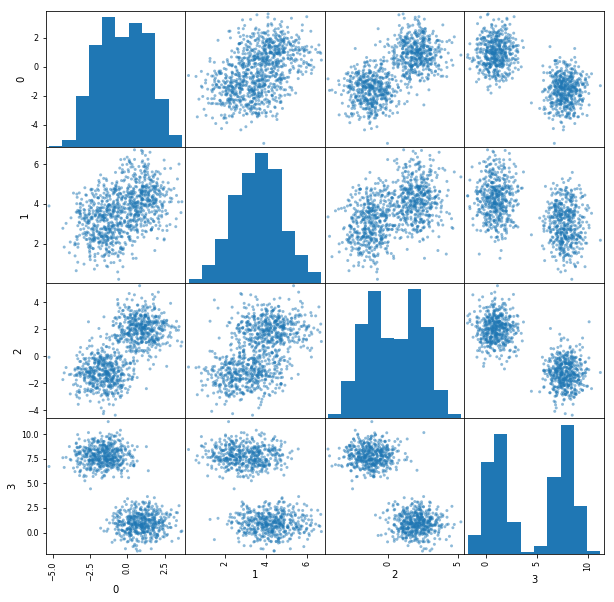

In [8]:
import pandas as pd 
*_, hist = pd.plotting.scatter_matrix(pd.DataFrame(X), figsize=(10,10))

### b) 
Beschreiben Sie kurz die Funktionsweise der Hauptkomponentenanalyse. Geben
Sie in Worten und in der richtigen Reihenfolge die notwendigen Berechnungen zur
Durchführung der Hauptkomponentenanalyse an.

Die PCA dekorreliert die Features untereinander, indem sie nach einer neuen Basis mit maximaler Varianz entlang der Basisvektoren sucht.  
Besonders eignet sie sich für Gaußverteilte Zufallszahlen, da dann die Kovarianzmatrix sogar diagonal wird.  
Die Berechnung funktioniert (soweit ich bislang weiß) wie folgt:
+ Die Beobachtungen $\vec{x}_i$ werden zentriert, indem jeweils der n-dimensionale Mittelwert $\vec{\mu}$ abgezogen wird: $$ \vec{x}_i^´ = \vec{x}_i - \vec{\mu}.$$
+ Die Kovarianzmatrix der zentrierten Beobachtungen wird bestimmt: $$ cov(X) = (X - M)(X - M)^T. $$
+ Deren Eigenvektoren und -werte $\lambda_i$ werden bestimmt 
+ Auswahl einer gewissen Anzahl signifikanter Eigenwerte. Der Anteil der Varianz, den die ausgewählten Vektoren beschreiben, ist dann $$ \sum_i \lambda_i /n. $$
+ Aus den zugehörigen Eigenvektoren wird die Ladungsmatrix $P$ bestimmt. 
+ Die transformierten Daten sind dann gegeben durch $$ T = XP. $$ 

Das Verfahren kann insbesondere zur Reduzierung der Dimension eines Datensatzes verwendet werden.

### c) 
Wenden Sie nun die Hauptkomponentenanalyse auf den in a) erzeugten Datensatz an. Nutzen Sie dazu das Paket `sklearn.decomposition.PCA`. Wie lauten die Eigenwerte der Kovarianzmatrix? Wie interpretieren Sie die Eigenwerte?

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

Eigenwerte der Kovarianzmatrix:

In [12]:
pca.explained_variance_

array([17.51933024,  0.99958442,  0.98813673,  0.89875061])

Oder als Verhältnis:

In [13]:
pca.explained_variance_ratio_

array([0.85854652, 0.0489853 , 0.0484243 , 0.04404388])

### d) 
Histrogrammieren Sie nun 𝑥′ in jeder Dimension und stellen sie $𝑥_1′$ und $𝑥_2′$ in einem Scatterplot dar.

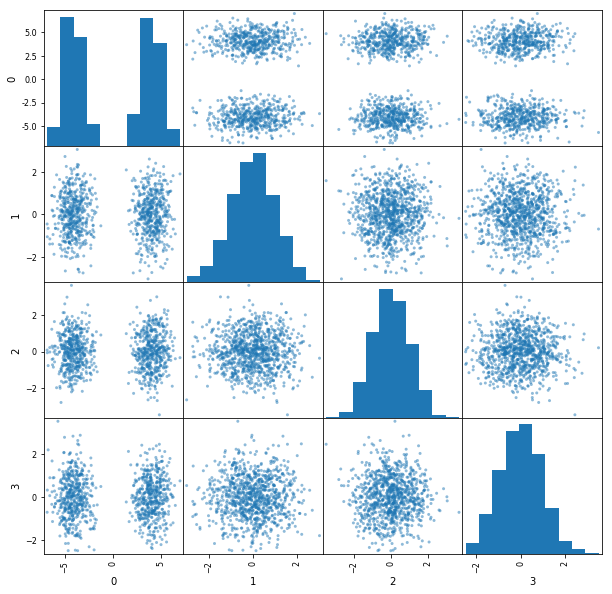

In [14]:
*_, HS = pd.plotting.scatter_matrix(pd.DataFrame(X_pca), figsize=(10,10))

Habe hier ein interessantes Beispiel von nem Kaggle-HS gefunden: https://www.kaggle.com/pmmilewski/pca-decomposition-and-keras-neural-network